In [3]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
from scipy.spatial.transform import Rotation

import utils
from importlib import reload

sns.set_theme(palette=sns.color_palette("twilight_shifted"))

In [4]:
r1 = r2 = np.identity(3)
t1, t2 = np.array([0, 0, 1]).reshape(-1, 1), np.array([0, 0, 20]).reshape(-1, 1)
k1 = k2 = np.array([[700, 0, 600], [0, 700, 400], [0, 0, 1]])
Q = np.array([1, 1, 0])

## **Exercise 5.1** ProjectionMatrices

In [5]:
p1 = utils.make_projection_matrix(k1, r1, t1)
p2 = utils.make_projection_matrix(k2, r2, t2)

q1 = utils.projectpoints(k1, r1, t1, Q, return_hom=False)
q2 = utils.projectpoints(k2, r2, t2, Q, return_hom=False)
np.set_printoptions(suppress=True)
print(f"{p1=}\n{p2=}\n{q1=}\n{q2=}")

p1=array([[700.,   0., 600., 600.],
       [  0., 700., 400., 400.],
       [  0.,   0.,   1.,   1.]])
p2=array([[  700.,     0.,   600., 12000.],
       [    0.,   700.,   400.,  8000.],
       [    0.,     0.,     1.,    20.]])
q1=array([[1300.],
       [1100.]])
q2=array([[635.],
       [435.]])


## **Exercise 5.2** Adding noise to points

In [6]:
reload(utils)
# Adding noise to points
noise = np.array([1, -1]).reshape(-1, 1)
qnoise1 = q1 + noise
qnoise2 = q2 + noise

# Stacking them for the triangulation
qs = np.vstack([qnoise1, qnoise2])
ps = np.vstack([p1, p2])

# Triangulting the point
Qnoise = utils.hom_to_inhom(utils.triangulate(qs, ps, return_hom=True))

# Reprojecting points
q1noise = utils.projectpoints(k1, r1, t1, Qnoise)
q2noise = utils.projectpoints(k2, r2, t2, Qnoise)

print(f"Triangulated point q:\n\t{Qnoise}")
print(
    f"Distance between noise image in p1:\n\t{np.linalg.norm(qnoise1 - q1noise):.3f} pixels"
)
print(
    f"Distance between noise image in p2:\n\t{np.linalg.norm(qnoise2 - q2noise):7.3f} pixels"
)
print(
    f"Distance original point and triangulated point:\n\t{np.linalg.norm(Q - Qnoise):.3f}"
)

Triangulated point q:
	[1.01527507 0.98527057 0.00028579]
Distance between noise image in p1:
	13.433 pixels
Distance between noise image in p2:
	  0.672 pixels
Distance original point and triangulated point:
	0.021


## **Exercise 5.3** Nonlinear triangulation

In [7]:
reload(utils)
np.set_printoptions(suppress=True)
nonlin_Q = utils.triangulate_nonlin(qs, ps)

## **Exercise 5.4** Exploration of nonlin

In [8]:
print(f"Distance between real Q and original Q {np.linalg.norm(Q - nonlin_Q):.4f}")
org = np.linalg.norm(Q - Qnoise)
non = np.linalg.norm(Q - nonlin_Q)
print(f"Improvement: factor of {(non/org)*100:.2f} ")

Distance between real Q and original Q 0.0021
Improvement: factor of 9.98 


# **Camera Calibration**
## **Exercise 5.5** Take images of target checkerboard

In [9]:
import cv2
import matplotlib.pyplot as plt

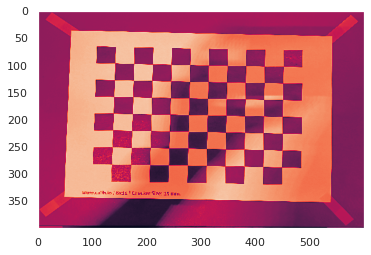

In [10]:
fn = "../data/calibration/top.jpg"
img = cv2.cvtColor(cv2.imread(fn), cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (600, 400))


plt.imshow(img)
plt.grid(False)

In [11]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

retval, corners = cv2.findChessboardCorners(
    img,
    (7, 10),
    cv2.CALIB_CB_ADAPTIVE_THRESH
    + cv2.CALIB_CB_FAST_CHECK
    + cv2.CALIB_CB_NORMALIZE_IMAGE,
)

TypeError: 'NoneType' object is not subscriptable

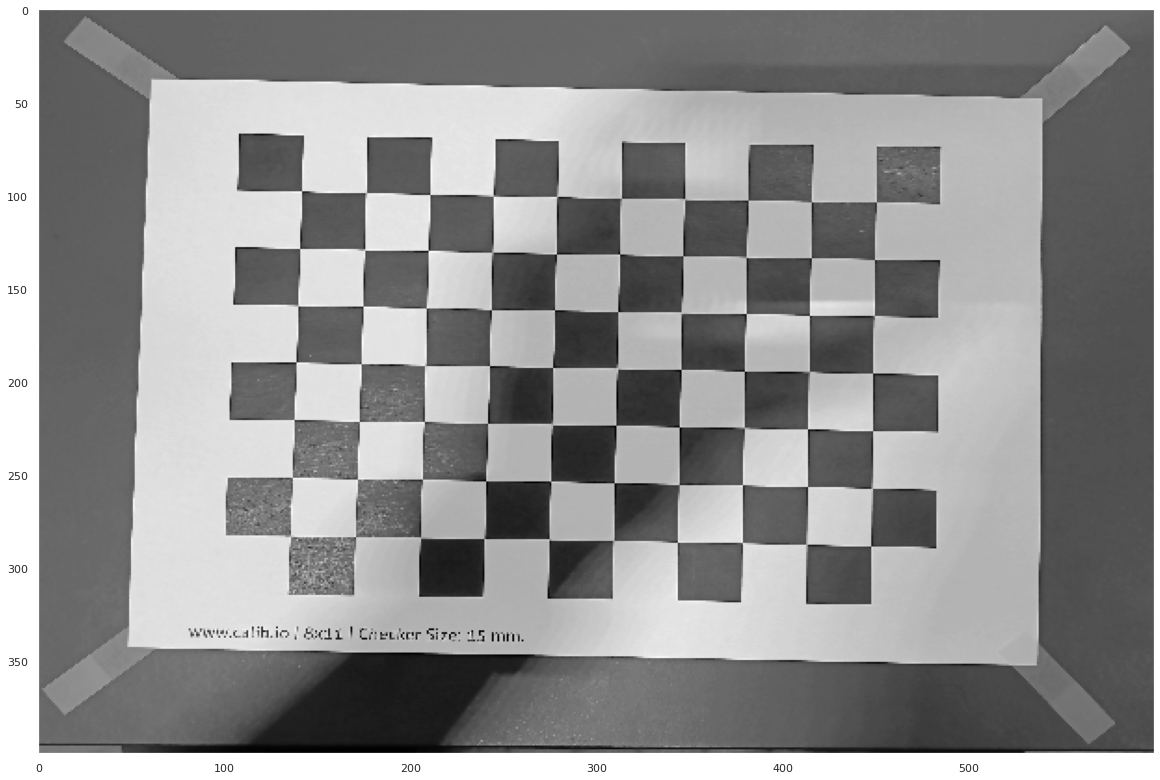

In [12]:
plt.figure(figsize=(20, 20))
plt.grid(False)
plt.imshow(img, cmap="gray")
plt.scatter(corners[:, :, 0], corners[:, :, 1], s=100, c="blue")